In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
%matplotlib inline
data=pd.read_csv("diabetes.csv")

In [52]:
X=data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=data['Outcome']
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [54]:
# Creating Logistic Regression (LR) Classifier
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(max_iter=6000)
model_lr=logit.fit(X_train, y_train)

In [60]:
# Here, we want to find the best threshold, which results in the highest F1-score
yhat = model_lr.predict_proba(X_test)
yhat = yhat[:, 1]
# calculate precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

In [61]:
# Calculate the F1-scores realted to each specific threshold
f_scores=[]
threshold=[]
for i, j, k in zip(precision, recall, thresholds):
  f_score=2*(i*j)/(i+j)
  f_scores.append(f_score)
  threshold.append(k)

In [81]:
# Find the maximum F1-score
max_f1=np.argmax(f_scores)
f1=f_scores[max_f1]
print('The highest F1-score is equal to', f1)

The highest F1-score is equal to 0.7528089887640449


In [82]:
# Find the optimal threshold for the highest F1-score
print('The optimal threshold for F1-score is equal to', threshold[max])

The optimal threshold for F1-score is equal to 0.33010404773995233


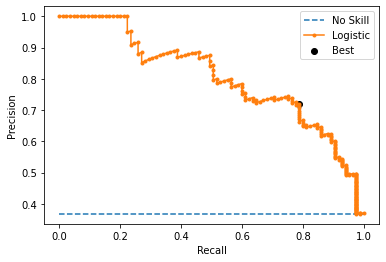

In [89]:
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[max_f1], precision[max_f1], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [85]:
# Find the maximum accuracy
accuracies=[]
preds=[]
for i in thresholds:
  preds_lr=[]
  for j in range(len(yhat)):
    if yhat[j]>=i:
      preds_lr.append(1)
    else:
      preds_lr.append(0)
  acc=accuracy_score(y_test, preds_lr)
  accuracies.append(acc)
  preds.append(preds_lr)
max_acc=np.argmax(accuracies)
acc=accuracies[max_acc]
print('The highest accuracy is equal to', acc)

The highest accuracy is equal to 0.8138528138528138


In [86]:
# Find the optimal threshold for the highest accuracy
print('The optimal threshold for F1-score is equal to', threshold[max_acc])

The optimal threshold for F1-score is equal to 0.3565894543617987


0.8138528138528138

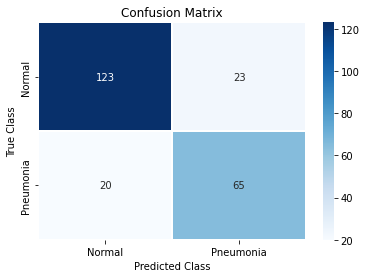

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix_svm_rbf=confusion_matrix(y_test, preds[max_acc])
ax=plt.subplot()
sns.heatmap(cf_matrix_svm_rbf, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])
accuracy_score(y_test, preds[max_acc])

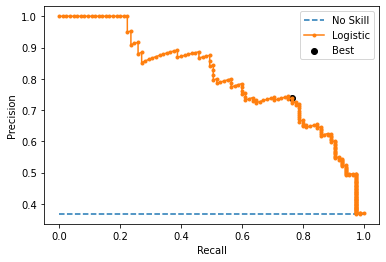

In [93]:
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[max_acc], precision[max_acc], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()